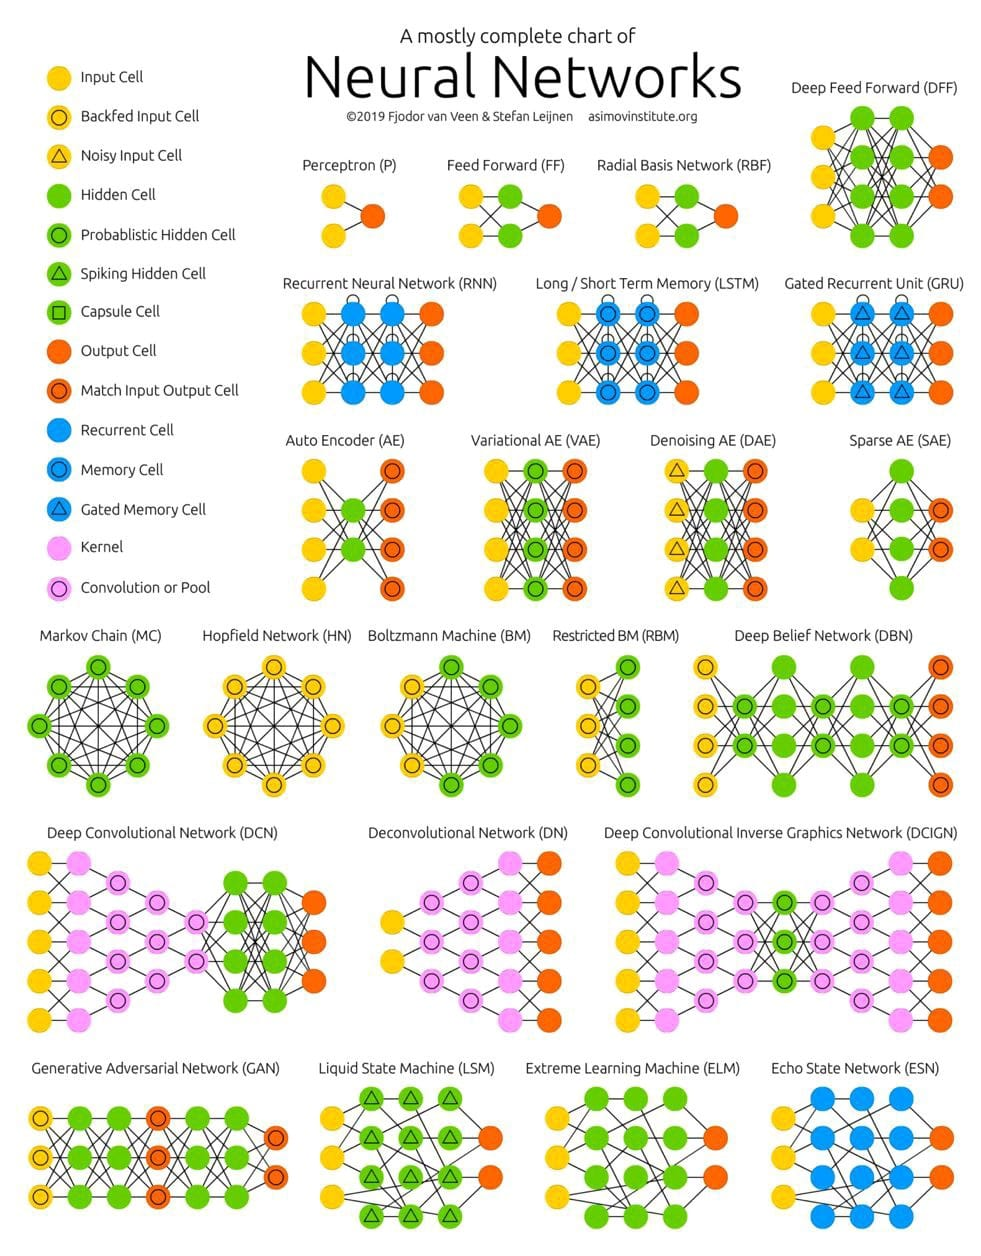

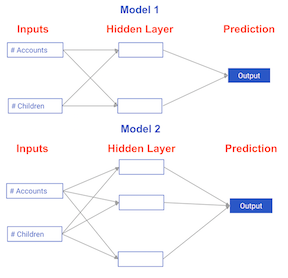

 Correct! Model 2 has more nodes in the hidden layer, and therefore,greater ability to capture interactions. 

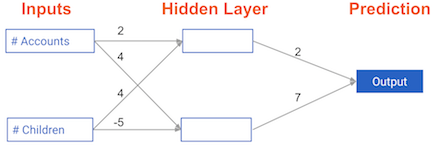

In [1]:
import numpy as np
input_data = np.array([3, 5])

In [2]:
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [3]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)


-39


Wonderful work! It looks like the network generated a prediction of -39.

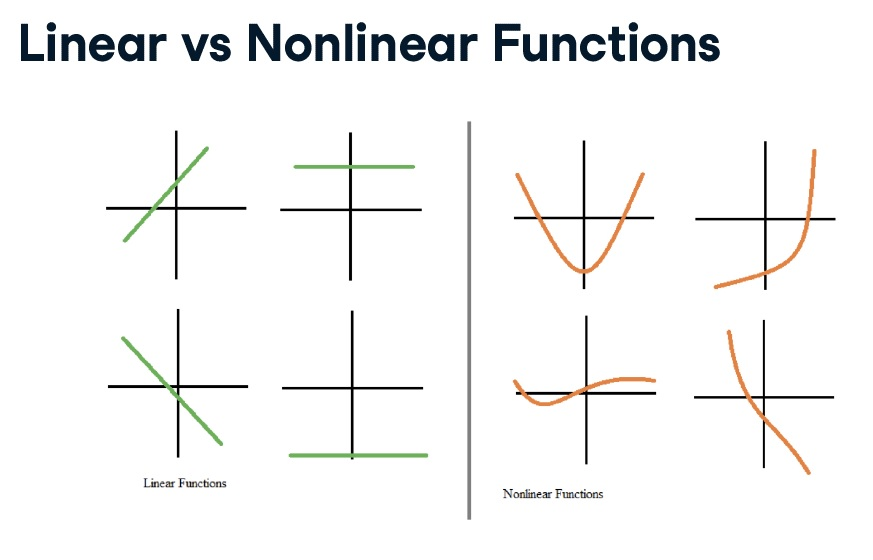

The Rectified Linear Activation Function

As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3
relu(-3) = 0



In [4]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


Great work! You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.

Applying the network to many observations/rows of data

You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

In [5]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]

In [6]:
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [7]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[52, 63, 0, 148]


Great work!

Forward propagation in a deeper network

You now have a model with 2 hidden layers. The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines. What prediction would this model make on this data point?

Assume the activation function at each node is the identity function. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is -1, and not 0, as it would be if the ReLU activation function was used.



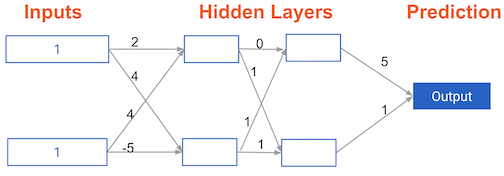

output = 0

Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output'].



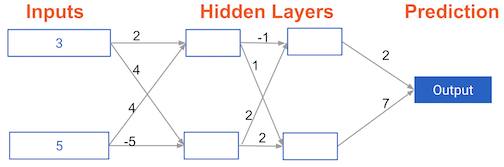

In [8]:
input_data = np.array([3, 5])

In [9]:
weights['node_0_0'] = np.array([2, 4])

In [10]:
weights['node_0_1'] = np.array([ 4, -5])

In [11]:
weights['node_1_0'] = np.array([-1,  2])

In [12]:
weights['node_1_1'] = np.array([1, 2])

In [13]:
weights['output'] = np.array([2, 7])

In [14]:
# maybe wrong function 
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


182


In [15]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


Wonderful work! The network generated a prediction of 182.

Representations are learned

How are the weights that determine the features/interactions in Neural Networks created?

The answer: 
The model training process sets them to optimize predictive accuracy.


Exactly! You will learn more about how Neural Networks optimize their weights in the next chapter!

Levels of representation

Which layers of a model capture more complex or "higher level" interactions?

Exactly! The last layers capture the most complex interactions.

# Chapter 2

Calculating model errors

For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.

What is the error (predicted - actual) for the following network using the ReLU activation function when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5? It may be helpful to get out a pen and piece of paper to calculate these values.

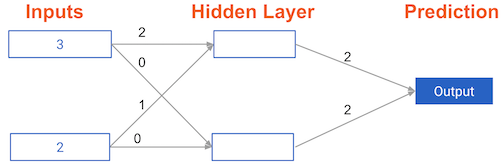

The answer: 11

Well done! The network generates a prediction of 16, which results in an error of 11.

Understanding how weights change model accuracy

Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from node_0 to the output is 2, as shown below. If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?

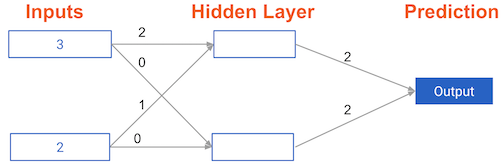

Exactly! Increasing the weight to 2.01 would increase the resulting error from 9 to 9.08, making the predictions less accurate.

Coding how weight changes affect accuracy

Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network:

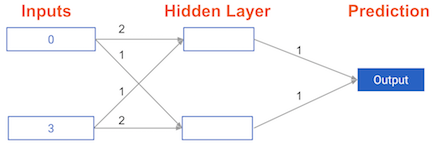



Its weights have been pre-loaded as weights_0. Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

Use a pen and paper if necessary to experiment with different combinations. You'll use the predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [16]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


Fantastic! The network now generates a perfect prediction with an error of 0.

Scaling up to multiple data points

You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.



In [17]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

In [18]:
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}

In [19]:
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}

In [20]:
target_actuals = [1, 3, 5, 7]

In [21]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


Excellent work! It looks like model_output_1 has a higher mean squared error.

Calculating slopes

You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (xb-y), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target you want to predict is stored in target.



In [22]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [23]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)


[14 28 42]


Well done! You can now use this slope to improve the weights of the model!

Improving model weights

Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

The weights have been pre-loaded as weights, the actual value of the target as target, and the input data as input_data. The predictions from the initial weights are stored as preds.



In [24]:
weights = np.array([0, 2, 1])
target = 0
input_data = np.array([1, 2, 3]) 
preds = 7

In [25]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


Fantastic! Updating the model weights did indeed decrease the error!

Making multiple updates to weights

You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.



In [26]:
def get_slope(input_data, target, weights):
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()

    # Calculate the error: error
    error = preds - target

    # Calculate the slope: slope
    slope = 2 * input_data * error
    
    return slope 

In [27]:
def get_mse(input_data, target, weights_updated):

    # Get updated predictions: preds_updated
    preds_updated = (weights_updated * input_data).sum()

    # Calculate updated error: error_updated
    error_updated = preds_updated - target
    
    return error_updated

In [28]:
weights = np.array([0, 2, 1])
learning_rate = 0.01
slope = np.array([0.02725495, 0.05450991, 0.08176486])

In [29]:
import matplotlib.pyplot as plt 

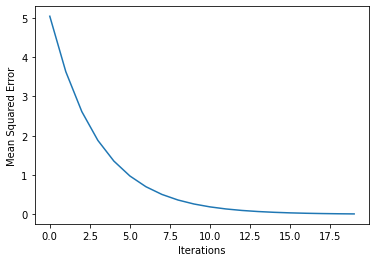

In [30]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


Great work! As you can see, the mean squared error decreases as the number of iterations go up.

The relationship between forward and backward propagation

If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?

The answer: 4

Exactly! Each time you generate predictions using forward propagation, you update the weights using backward propagation.

Thinking about backward propagation

If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?

The answer: The updates to all weights in the network would also be 0.

Correct! In this situation, the updates to all weights in the network would indeed also be 0.

A round of backpropagation

In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.

This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).

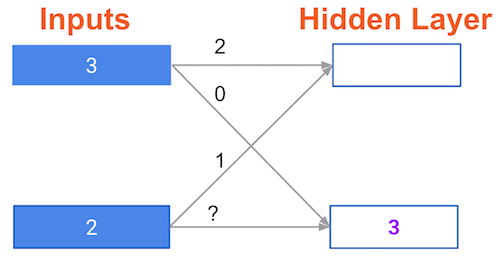

What is the slope needed to update the weight with the question mark?

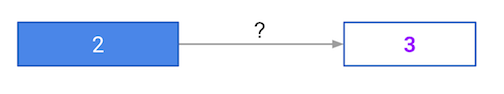

Hint

Recall the three things you need to multiply to get slopes associated with any weight:

Value at the node feeding into the weight.

The slope of the activation function for the node being fed into.

The slope of the loss function with respect to the output node.

In [31]:
2*1*3

6

The answer: 6

Well done! The slope needed to update this weight is indeed 6. You're now ready to start building deep learning models with keras!

# Chapter 3

Understanding your data

You will soon start building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.

The data is pre-loaded into a pandas DataFrame called df. Use the .head() and .describe() methods in the IPython Shell for a quick overview of the DataFrame.

The target variable you'll be predicting is wage_per_hour. Some of the predictor variables are binary indicators, where a value of 1 represents True, and 0 represents False.

Of the 9 predictor variables in the DataFrame, how many are binary indicators? The min and max values as shown by .describe() will be informative here. How many binary indicator predictors are there?



In [32]:
import pandas as pd 

In [127]:
df = pd.read_csv('c:/Users/waelr/Desktop/hourly_wages.csv')

In [128]:
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [129]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Exactly! There are 6 binary indicators.

Specifying a model

Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.



In [130]:
predictors = np.loadtxt('c:/Users/waelr/Desktop/hourly_wages.csv', delimiter=',', skiprows=1)

In [131]:
predictors

array([[ 5.1 ,  0.  ,  8.  , ...,  0.  ,  1.  ,  0.  ],
       [ 4.95,  0.  ,  9.  , ...,  0.  ,  1.  ,  0.  ],
       [ 6.67,  0.  , 12.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [23.25,  1.  , 17.  , ...,  0.  ,  0.  ,  0.  ],
       [19.88,  1.  , 12.  , ...,  1.  ,  0.  ,  0.  ],
       [15.38,  0.  , 16.  , ...,  0.  ,  1.  ,  0.  ]])

In [132]:
predictors = np.array(df) 

In [133]:
predictors

array([[ 5.1 ,  0.  ,  8.  , ...,  0.  ,  1.  ,  0.  ],
       [ 4.95,  0.  ,  9.  , ...,  0.  ,  1.  ,  0.  ],
       [ 6.67,  0.  , 12.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [23.25,  1.  , 17.  , ...,  0.  ,  0.  ,  0.  ],
       [19.88,  1.  , 12.  , ...,  1.  ,  0.  ,  0.  ],
       [15.38,  0.  , 16.  , ...,  0.  ,  1.  ,  0.  ]])

In [134]:
len(predictors)

534

In [135]:
n_cols = predictors.shape[1]
n_cols

10

Remember 0 for row 1 for column

In [136]:
predictors.shape

(534, 10)

In [137]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))


Compiling the model

You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam optimizer is an excellent choice. You can read more about it as well as other keras optimizers here, and if you are really curious to learn more, you can read the original paper that introduced the Adam optimizer.

In this exercise, you'll use the Adam optimizer and the mean squared error loss function. Go for it!



In [138]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


Fantastic work - all that's left now is to fit the model!

Fitting the model

You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previous exercise.

In [139]:
target = np.array([ 5.1 ,  4.95,  6.67,  4.  ,  7.5 , 13.07,  4.45, 19.47, 13.28,
        8.75, 11.35, 11.5 ,  6.5 ,  6.25, 19.98,  7.3 ,  8.  , 22.2 ,
        3.65, 20.55,  5.71,  7.  ,  3.75,  4.5 ,  9.56,  5.75,  9.36,
        6.5 ,  3.35,  4.75,  8.9 ,  4.  ,  4.7 ,  5.  ,  9.25, 10.67,
        7.61, 10.  ,  7.5 , 12.2 ,  3.35, 11.  , 12.  ,  4.85,  4.3 ,
        6.  , 15.  ,  4.85,  9.  ,  6.36,  9.15, 11.  ,  4.5 ,  4.8 ,
        4.  ,  5.5 ,  8.4 ,  6.75, 10.  ,  5.  ,  6.5 , 10.75,  7.  ,
       11.43,  4.  ,  9.  , 13.  , 12.22,  6.28,  6.75,  3.35, 16.  ,
        5.25,  3.5 ,  4.22,  3.  ,  4.  , 10.  ,  5.  , 16.  , 13.98,
       13.26,  6.1 ,  3.75,  9.  ,  9.45,  5.5 ,  8.93,  6.25,  9.75,
        6.73,  7.78,  2.85,  3.35, 19.98,  8.5 ,  9.75, 15.  ,  8.  ,
       11.25, 14.  , 10.  ,  6.5 ,  9.83, 18.5 , 12.5 , 26.  , 14.  ,
       10.5 , 11.  , 12.47, 12.5 , 15.  ,  6.  ,  9.5 ,  5.  ,  3.75,
       12.57,  6.88,  5.5 ,  7.  ,  4.5 ,  6.5 , 12.  ,  5.  ,  6.5 ,
        6.8 ,  8.75,  3.75,  4.5 ,  6.  ,  5.5 , 13.  ,  5.65,  4.8 ,
        7.  ,  5.25,  3.35,  8.5 ,  6.  ,  6.75,  8.89, 14.21, 10.78,
        8.9 ,  7.5 ,  4.5 , 11.25, 13.45,  6.  ,  4.62, 10.58,  5.  ,
        8.2 ,  6.25,  8.5 , 24.98, 16.65,  6.25,  4.55, 11.25, 21.25,
       12.65,  7.5 , 10.25,  3.35, 13.45,  4.84, 26.29,  6.58, 44.5 ,
       15.  , 11.25,  7.  , 10.  , 14.53, 20.  , 22.5 ,  3.64, 10.62,
       24.98,  6.  , 19.  , 13.2 , 22.5 , 15.  ,  6.88, 11.84, 16.14,
       13.95, 13.16,  5.3 ,  4.5 , 10.  , 10.  , 10.  ,  9.37,  5.8 ,
       17.86,  1.  ,  8.8 ,  9.  , 18.16,  7.81, 10.62,  4.5 , 17.25,
       10.5 ,  9.22, 15.  , 22.5 ,  4.55,  9.  , 13.33, 15.  ,  7.5 ,
        4.25, 12.5 ,  5.13,  3.35, 11.11,  3.84,  6.4 ,  5.56, 10.  ,
        5.65, 11.5 ,  3.5 ,  3.35,  4.75, 19.98,  3.5 ,  4.  ,  7.  ,
        6.25,  4.5 , 14.29,  5.  , 13.75, 13.71,  7.5 ,  3.8 ,  5.  ,
        9.42,  5.5 ,  3.75,  3.5 ,  5.8 , 12.  ,  5.  ,  8.75, 10.  ,
        8.5 ,  8.63,  9.  ,  5.5 , 11.11, 10.  ,  5.2 ,  8.  ,  3.56,
        5.2 , 11.67, 11.32,  7.5 ,  5.5 ,  5.  ,  7.75,  5.25,  9.  ,
        9.65,  5.21,  7.  , 12.16,  5.25, 10.32,  3.35,  7.7 ,  9.17,
        8.43,  4.  ,  4.13,  3.  ,  4.25,  7.53, 10.53,  5.  , 15.03,
       11.25,  6.25,  3.5 ,  6.85, 12.5 , 12.  ,  6.  ,  9.5 ,  4.1 ,
       10.43,  5.  ,  7.69,  5.5 ,  6.4 , 12.5 ,  6.25,  8.  ,  9.6 ,
        9.1 ,  7.5 ,  5.  ,  7.  ,  3.55,  8.5 ,  4.5 ,  7.88,  5.25,
        5.  ,  9.33, 10.5 ,  7.5 ,  9.5 ,  9.6 ,  5.87, 11.02,  5.  ,
        5.62, 12.5 , 10.81,  5.4 ,  7.  ,  4.59,  6.  , 11.71,  5.62,
        5.5 ,  4.85,  6.75,  4.25,  5.75,  3.5 ,  3.35, 10.62,  8.  ,
        4.75,  8.5 ,  8.85,  8.  ,  6.  ,  7.14,  3.4 ,  6.  ,  3.75,
        8.89,  4.35, 13.1 ,  4.35,  3.5 ,  3.8 ,  5.26,  3.35, 16.26,
        4.25,  4.5 ,  8.  ,  4.  ,  7.96,  4.  ,  4.15,  5.95,  3.6 ,
        8.75,  3.4 ,  4.28,  5.35,  5.  ,  7.65,  6.94,  7.5 ,  3.6 ,
        1.75,  3.45,  9.63,  8.49,  8.99,  3.65,  3.5 ,  3.43,  5.5 ,
        6.93,  3.51,  3.75,  4.17,  9.57, 14.67, 12.5 ,  5.5 ,  5.15,
        8.  ,  5.83,  3.35,  7.  , 10.  ,  8.  ,  6.88,  5.55,  7.5 ,
        8.93,  9.  ,  3.5 ,  5.77, 25.  ,  6.85,  6.5 ,  3.75,  3.5 ,
        4.5 ,  2.01,  4.17, 13.  ,  3.98,  7.5 , 13.12,  4.  ,  3.95,
       13.  ,  9.  ,  4.55,  9.5 ,  4.5 ,  8.75, 10.  , 18.  , 24.98,
       12.05, 22.  ,  8.75, 22.2 , 17.25,  6.  ,  8.06,  9.24, 12.  ,
       10.61,  5.71, 10.  , 17.5 , 15.  ,  7.78,  7.8 , 10.  , 24.98,
       10.28, 15.  , 12.  , 10.58,  5.85, 11.22,  8.56, 13.89,  5.71,
       15.79,  7.5 , 11.25,  6.15, 13.45,  6.25,  6.5 , 12.  ,  8.5 ,
        8.  ,  5.75, 15.73,  9.86, 13.51,  5.4 ,  6.25,  5.5 ,  5.  ,
        6.25,  5.75, 20.5 ,  5.  ,  7.  , 18.  , 12.  , 20.4 , 22.2 ,
       16.42,  8.63, 19.38, 14.  , 10.  , 15.95, 20.  , 10.  , 24.98,
       11.25, 22.83, 10.2 , 10.  , 14.  , 12.5 ,  5.79, 24.98,  4.35,
       11.25,  6.67,  8.  , 18.16, 12.  ,  8.89,  9.5 , 13.65, 12.  ,
       15.  , 12.67,  7.38, 15.56,  7.45,  6.25,  6.25,  9.37, 22.5 ,
        7.5 ,  7.  ,  5.75,  7.67, 12.5 , 16.  , 11.79, 11.36,  6.1 ,
       23.25, 19.88, 15.38])

In [140]:
len(target)

534

In [141]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)


17/17 [==============================] - 1s 2ms/step - loss: 128.8130


In [142]:
from keras.models import load_model
model.save('model_reg.h5') 
model = load_model('model_reg.h5')

Superb! You now know how to specify, compile, and fit a deep learning model using keras!

Understanding your classification data

Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as age, fare and where each passenger embarked from to predict who will survive. This data is from a tutorial on data science competitions. Look here for descriptions of the features.

The data is pre-loaded in a pandas DataFrame called df.

It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted. What was the maximum age of passengers on the Titanic? Use the .describe() method in the IPython Shell to answer this question.



In [143]:
df = pd.read_csv('c:/Users/waelr/Desktop/titanic_all_numeric.csv')

In [144]:
df.describe() 

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


The answer: 80

Exactly! The maximum age in the data is 80.

Last steps in classification models
You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. You'll learn more about this in the next chapter!



In [145]:
df

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.000000,1,0,7.2500,1,False,0,0,1
1,1,1,38.000000,1,0,71.2833,0,False,1,0,0
2,1,3,26.000000,0,0,7.9250,0,False,0,0,1
3,1,1,35.000000,1,0,53.1000,0,False,0,0,1
4,0,3,35.000000,0,0,8.0500,1,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,False,0,0,1
887,1,1,19.000000,0,0,30.0000,0,False,0,0,1
888,0,3,29.699118,1,2,23.4500,0,True,0,0,1
889,1,1,26.000000,0,0,30.0000,1,False,1,0,0


In [146]:
predictors = df.drop(['survived'], axis=1).astype(float).to_numpy()

In [147]:
predictors

array([[ 3.        , 22.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

Last steps in classification models

You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. You'll learn more about this in the next chapter!



In [148]:
predictors.shape 

(891, 10)

In [161]:
# from Gitub we should convert array to float32
predictors=np.asarray(predictors).astype(np.float32)

In [162]:
predictors

array([[ 3.      , 22.      ,  1.      , ...,  0.      ,  0.      ,
         1.      ],
       [ 1.      , 38.      ,  1.      , ...,  1.      ,  0.      ,
         0.      ],
       [ 3.      , 26.      ,  0.      , ...,  0.      ,  0.      ,
         1.      ],
       ...,
       [ 3.      , 29.699118,  1.      , ...,  0.      ,  0.      ,
         1.      ],
       [ 1.      , 26.      ,  0.      , ...,  1.      ,  0.      ,
         0.      ],
       [ 3.      , 32.      ,  0.      , ...,  0.      ,  1.      ,
         0.      ]], dtype=float32)

In [163]:
from tensorflow.keras.utils import to_categorical

In [164]:
target = to_categorical(df.survived)
target

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [165]:
# Convert the target to categorical: target
target = to_categorical(df.survived)

In [166]:
target

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [167]:
n_cols = 10 


In [168]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)


28/28 [==============================] - 1s 1ms/step - loss: 3.8172 - accuracy: 0.5327


Note: there is problem in code from keras.utils import to_categorical we put from tensorflow.keras.utils import to_categorical instead of it

There is problem in this result

the result in course

Epoch 1/10

 32/891 [>.............................] - ETA: 0s - loss: 7.6250 - acc: 0.2188
800/891 [=========================>....] - ETA: 0s - loss: 2.3410 - acc: 0.6038
891/891 [==============================] - 0s - loss: 2.5170 - acc: 0.5948     
Epoch 2/10

 32/891 [>.............................] - ETA: 0s - loss: 1.1922 - acc: 0.3125
832/891 [===========================>..] - ETA: 0s - loss: 1.2204 - acc: 0.5998
891/891 [==============================] - 0s - loss: 1.1834 - acc: 0.6083     
Epoch 3/10

 32/891 [>.............................] - ETA: 0s - loss: 2.1141 - acc: 0.5000
800/891 [=========================>....] - ETA: 0s - loss: 0.8100 - acc: 0.6550
891/891 [==============================] - 0s - loss: 0.7783 - acc: 0.6700     
Epoch 4/10

 32/891 [>.............................] - ETA: 0s - loss: 0.7271 - acc: 0.5625
832/891 [===========================>..] - ETA: 0s - loss: 0.7376 - acc: 0.6611
891/891 [==============================] - 0s - loss: 0.7257 - acc: 0.6689     
Epoch 5/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6173 - acc: 0.5938
832/891 [===========================>..] - ETA: 0s - loss: 0.6466 - acc: 0.6550
891/891 [==============================] - 0s - loss: 0.6529 - acc: 0.6588     
Epoch 6/10

 32/891 [>.............................] - ETA: 0s - loss: 0.4729 - acc: 0.7500
832/891 [===========================>..] - ETA: 0s - loss: 0.6186 - acc: 0.6959
891/891 [==============================] - 0s - loss: 0.6164 - acc: 0.6936     
Epoch 7/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6732 - acc: 0.5938
832/891 [===========================>..] - ETA: 0s - loss: 0.6331 - acc: 0.6839
891/891 [==============================] - 0s - loss: 0.6302 - acc: 0.6880     
Epoch 8/10

 32/891 [>.............................] - ETA: 0s - loss: 0.5363 - acc: 0.7188
768/891 [========================>.....] - ETA: 0s - loss: 0.6208 - acc: 0.6849
891/891 [==============================] - 0s - loss: 0.6199 - acc: 0.6891     
Epoch 9/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6629 - acc: 0.6250
832/891 [===========================>..] - ETA: 0s - loss: 0.6052 - acc: 0.6923
891/891 [==============================] - 0s - loss: 0.5959 - acc: 0.6970     
Epoch 10/10

 32/891 [>.............................] - ETA: 0s - loss: 0.4738 - acc: 0.7500
832/891 [===========================>..] - ETA: 0s - loss: 0.6351 - acc: 0.6839
891/891 [==============================] - 0s - loss: 0.6374 - acc: 0.6813    

Fantastic! This simple model is generating an accuracy of 68!

Making predictions

The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

Instructions

Create your predictions using the model's .predict() method on pred_data.
Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second column (index 1) of predictions. Store the result in predicted_prob_true and print it.



In [156]:
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]], dtype=object)

In [169]:
# from Gitub we should convert array to float32
pred_data=np.asarray(pred_data).astype(np.float32)

In [170]:
pred_data

array([[  2.      ,  34.      ,   0.      ,   0.      ,  13.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  31.      ,   1.      ,   1.      ,  26.25    ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  11.      ,   1.      ,   2.      , 120.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,   0.42    ,   0.      ,   1.      ,   8.5167  ,
          1.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  27.      ,   0.      ,   0.      ,   6.975   ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  31.      ,   0.      ,   0.      ,   7.775   ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  39.      ,   0.      ,   0.      ,   0.      ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  18.      ,   0.     

In [171]:
from keras.models import load_model
model.save('model.h5') 
model = load_model('model.h5')



In [172]:

len(pred_data) 

91

In [173]:
pred_data.shape 

(91, 10)

In [174]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[0.12563148 0.23358822 0.99983    0.4580914  0.15730965 0.12196453
 0.08060504 0.28484094 0.08550768 0.18626636 0.17688794 0.15756948
 0.10188618 0.766084   0.1284812  0.14095236 0.20731829 0.2637768
 0.05209008 0.5459398  0.08747815 0.17123719 0.08586453 0.21313503
 0.9527425  0.13647142 0.26850945 0.9685457  0.1422418  0.06594499
 0.41393706 0.8196817  0.11668379 0.2172422  0.3046223  0.23382951
 0.25705197 0.13410415 0.2467654  0.23332728 0.26506948 0.3672792
 0.21133624 0.08570707 0.32790932 0.05328844 0.3471588  0.08095147
 0.29850945 0.7352846  0.8534306  0.00566488 0.49638778 0.45112863
 0.11748218 0.32721987 0.9882727  0.06859124 0.32206216 0.11668379
 0.09658303 0.3089277  0.07883168 0.3362374  0.2533319  0.06349784
 0.19923082 0.21279031 0.14455843 0.53794783 0.17696063 0.12688577
 0.09154889 0.03737903 0.2563029  0.30057672 0.28817746 0.28178653
 0.13303082 0.08399598 0.31324708 0.10540728 0.24985999 0.17150755
 0.18212348 0.20191783 0.20772567 0.31358445 0.28507116 0.256360

[0.18669957 0.4134411  0.6978398  0.45647332 0.156258   0.13335077
 0.06694014 0.29983512 0.14290817 0.5088993  0.17624511 0.22952728
 0.14731686 0.41819912 0.13998084 0.11106528 0.24035908 0.44151205
 0.05976173 0.42191023 0.58706135 0.17687467 0.0706953  0.2591397
 0.45652345 0.13296013 0.45551723 0.5088828  0.14129753 0.52517116
 0.3947247  0.48196107 0.1588164  0.20536639 0.26923266 0.62193865
 0.23951618 0.15510483 0.4661891  0.42997164 0.23942114 0.3404467
 0.47713804 0.10784518 0.28805092 0.06946687 0.39471424 0.11748773
 0.4536736  0.68780553 0.41623312 0.0097428  0.42879698 0.5748592
 0.24148169 0.31945485 0.838177   0.18269329 0.36592352 0.1588164
 0.1001755  0.28254962 0.2341612  0.40761024 0.28413776 0.14343452
 0.30487683 0.5081016  0.17259248 0.4164798  0.17635131 0.4875466
 0.12122335 0.05803602 0.42088994 0.3483676  0.27063265 0.25053915
 0.15333283 0.5570654  0.45159394 0.12037271 0.29653975 0.2127945
 0.17482156 0.2829019  0.25306678 0.500382   0.32262158 0.46604946
 0.11703468]

Excellent work! You're now ready to begin learning how to fine-tune your models.

# Chapter 4

Diagnosing optimization problems
Which of the following could prevent a model from showing an improved loss in its first few epochs?

Learning rate too low.


Learning rate too high.


Poor choice of activation function.

All of the above.

Well done! All the options listed could prevent a model from showing an improved loss in its first few epochs.'

Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.



In [181]:
input_shape = (10,)

In [182]:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape = input_shape))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [186]:
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for learning_rate in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)




Testing model with learning rate: 0.000001



ValueError: Could not interpret optimizer identifier: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x000001F39710E9D0>

Testing model with learning rate: 0.000001

Epoch 1/10

 32/891 [>.............................] - ETA: 1s - loss: 3.6053
544/891 [=================>............] - ETA: 0s - loss: 3.6273
891/891 [==============================] - 0s - loss: 3.6057     
Epoch 2/10

 32/891 [>.............................] - ETA: 0s - loss: 3.5751
544/891 [=================>............] - ETA: 0s - loss: 3.5528
891/891 [==============================] - 0s - loss: 3.5656     
Epoch 3/10

 32/891 [>.............................] - ETA: 0s - loss: 2.6692
512/891 [================>.............] - ETA: 0s - loss: 3.3939
891/891 [==============================] - 0s - loss: 3.5255     
Epoch 4/10

 32/891 [>.............................] - ETA: 0s - loss: 3.0058
704/891 [======================>.......] - ETA: 0s - loss: 3.4634
891/891 [==============================] - 0s - loss: 3.4854     
Epoch 5/10

 32/891 [>.............................] - ETA: 0s - loss: 2.5452
608/891 [===================>..........] - ETA: 0s - loss: 3.3944
891/891 [==============================] - 0s - loss: 3.4454     
Epoch 6/10

 32/891 [>.............................] - ETA: 0s - loss: 3.4446
480/891 [===============>..............] - ETA: 0s - loss: 3.4553
891/891 [==============================] - 0s - loss: 3.4056     
Epoch 7/10

 32/891 [>.............................] - ETA: 0s - loss: 4.1073
576/891 [==================>...........] - ETA: 0s - loss: 3.4968
891/891 [==============================] - 0s - loss: 3.3659     
Epoch 8/10

 32/891 [>.............................] - ETA: 0s - loss: 3.0972
480/891 [===============>..............] - ETA: 0s - loss: 3.1637
891/891 [==============================] - 0s - loss: 3.3263     
Epoch 9/10

 32/891 [>.............................] - ETA: 0s - loss: 3.7464
448/891 [==============>...............] - ETA: 0s - loss: 3.2333
864/891 [============================>.] - ETA: 0s - loss: 3.3049
891/891 [==============================] - 0s - loss: 3.2867     
Epoch 10/10

 32/891 [>.............................] - ETA: 0s - loss: 3.3862
448/891 [==============>...............] - ETA: 0s - loss: 3.1540
864/891 [============================>.] - ETA: 0s - loss: 3.2075
891/891 [==============================] - 0s - loss: 3.2473     


Testing model with learning rate: 0.010000

Epoch 1/10

 32/891 [>.............................] - ETA: 1s - loss: 1.0910
416/891 [=============>................] - ETA: 0s - loss: 2.2983
608/891 [===================>..........] - ETA: 0s - loss: 1.8135
891/891 [==============================] - 0s - loss: 1.4852     
Epoch 2/10

 32/891 [>.............................] - ETA: 0s - loss: 2.4452
224/891 [======>.......................] - ETA: 0s - loss: 1.0214
608/891 [===================>..........] - ETA: 0s - loss: 0.7971
891/891 [==============================] - 0s - loss: 0.7460     
Epoch 3/10

 32/891 [>.............................] - ETA: 0s - loss: 0.5866
640/891 [====================>.........] - ETA: 0s - loss: 0.7311
891/891 [==============================] - 0s - loss: 0.7024     
Epoch 4/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6101
480/891 [===============>..............] - ETA: 0s - loss: 0.6851
891/891 [==============================] - 0s - loss: 0.6428     
Epoch 5/10

 32/891 [>.............................] - ETA: 0s - loss: 0.5019
640/891 [====================>.........] - ETA: 0s - loss: 0.6286
891/891 [==============================] - 0s - loss: 0.6328     
Epoch 6/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6838
544/891 [=================>............] - ETA: 0s - loss: 0.6014
891/891 [==============================] - 0s - loss: 0.6045     
Epoch 7/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6172
544/891 [=================>............] - ETA: 0s - loss: 0.6136
891/891 [==============================] - 0s - loss: 0.6054     
Epoch 8/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6202
576/891 [==================>...........] - ETA: 0s - loss: 0.5893
891/891 [==============================] - 0s - loss: 0.6102     
Epoch 9/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6566
576/891 [==================>...........] - ETA: 0s - loss: 0.6008
891/891 [==============================] - 0s - loss: 0.5991     
Epoch 10/10

 32/891 [>.............................] - ETA: 0s - loss: 0.6403
672/891 [=====================>........] - ETA: 0s - loss: 0.5907
891/891 [==============================] - 0s - loss: 0.5924     


Testing model with learning rate: 1.000000

Epoch 1/10

 32/891 [>.............................] - ETA: 1s - loss: 1.0273
448/891 [==============>...............] - ETA: 0s - loss: 5.4701
864/891 [============================>.] - ETA: 0s - loss: 5.9517
891/891 [==============================] - 0s - loss: 5.9885     
Epoch 2/10

 32/891 [>.............................] - ETA: 0s - loss: 4.5332
512/891 [================>.............] - ETA: 0s - loss: 6.0128
891/891 [==============================] - 0s - loss: 6.1867     
Epoch 3/10

 32/891 [>.............................] - ETA: 0s - loss: 7.0517
576/891 [==================>...........] - ETA: 0s - loss: 5.9883
891/891 [==============================] - 0s - loss: 6.1867     
Epoch 4/10

 32/891 [>.............................] - ETA: 0s - loss: 6.0443
544/891 [=================>............] - ETA: 0s - loss: 6.5183
891/891 [==============================] - 0s - loss: 6.1867     
Epoch 5/10

 32/891 [>.............................] - ETA: 0s - loss: 9.0664
608/891 [===================>..........] - ETA: 0s - loss: 5.9382
891/891 [==============================] - 0s - loss: 6.1867     
Epoch 6/10

 32/891 [>.............................] - ETA: 0s - loss: 6.0443
576/891 [==================>...........] - ETA: 0s - loss: 6.1842
891/891 [==============================] - 0s - loss: 6.1867     
Epoch 7/10

 32/891 [>.............................] - ETA: 0s - loss: 5.0369
480/891 [===============>..............] - ETA: 0s - loss: 6.5816
891/891 [==============================] - 0s - loss: 6.1867     
Epoch 8/10

 32/891 [>.............................] - ETA: 0s - loss: 5.0369
512/891 [================>.............] - ETA: 0s - loss: 5.9498
864/891 [============================>.] - ETA: 0s - loss: 6.1935
891/891 [==============================] - 0s - loss: 6.1867     
Epoch 9/10

 32/891 [>.............................] - ETA: 0s - loss: 5.5406
544/891 [=================>............] - ETA: 0s - loss: 6.0147
891/891 [==============================] - 0s - loss: 6.1867     
Epoch 10/10

 32/891 [>.............................] - ETA: 0s - loss: 5.5406
672/891 [=====================>........] - ETA: 0s - loss: 6.2362
891/891 [==============================] - 0s - loss: 6.1867     

Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [187]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)


20/20 [==============================] - 3s 43ms/step - loss: 1.7435 - accuracy: 0.5525 - val_loss: 0.8444 - val_accuracy: 0.6978


Fit the model
hist = model.fit(predictors, target, validation_split=0.3)
Train on 623 samples, validate on 268 samples
Epoch 1/10

 32/623 [>.............................] - ETA: 0s - loss: 3.3028 - acc: 0.4062
623/623 [==============================] - 0s - loss: 1.2586 - acc: 0.6003 - val_loss: 0.5926 - val_acc: 0.7201
Epoch 2/10

 32/623 [>.............................] - ETA: 0s - loss: 0.6124 - acc: 0.6875
623/623 [==============================] - 0s - loss: 0.6733 - acc: 0.6517 - val_loss: 0.5825 - val_acc: 0.7201
Epoch 3/10

 32/623 [>.............................] - ETA: 0s - loss: 0.6183 - acc: 0.6250
623/623 [==============================] - 0s - loss: 0.6502 - acc: 0.6469 - val_loss: 0.5387 - val_acc: 0.7388
Epoch 4/10

 32/623 [>.............................] - ETA: 0s - loss: 0.5274 - acc: 0.7812
544/623 [=========================>....] - ETA: 0s - loss: 0.6087 - acc: 0.6765
623/623 [==============================] - 0s - loss: 0.6195 - acc: 0.6758 - val_loss: 0.6574 - val_acc: 0.7052
Epoch 5/10

 32/623 [>.............................] - ETA: 0s - loss: 0.6128 - acc: 0.6875
576/623 [==========================>...] - ETA: 0s - loss: 0.7836 - acc: 0.6267
623/623 [==============================] - 0s - loss: 0.7948 - acc: 0.6148 - val_loss: 0.6937 - val_acc: 0.6493
Epoch 6/10

 32/623 [>.............................] - ETA: 0s - loss: 0.6191 - acc: 0.6562
544/623 [=========================>....] - ETA: 0s - loss: 0.7026 - acc: 0.6103
623/623 [==============================] - 0s - loss: 0.6906 - acc: 0.6180 - val_loss: 0.5160 - val_acc: 0.7575
Epoch 7/10

 32/623 [>.............................] - ETA: 0s - loss: 0.5304 - acc: 0.7500
608/623 [============================>.] - ETA: 0s - loss: 0.5951 - acc: 0.6957
623/623 [==============================] - 0s - loss: 0.5949 - acc: 0.6950 - val_loss: 0.5023 - val_acc: 0.7239
Epoch 8/10

 32/623 [>.............................] - ETA: 0s - loss: 0.6129 - acc: 0.7500
623/623 [==============================] - 0s - loss: 0.5906 - acc: 0.6870 - val_loss: 0.5405 - val_acc: 0.7388
Epoch 9/10

 32/623 [>.............................] - ETA: 0s - loss: 0.5775 - acc: 0.7188
623/623 [==============================] - 0s - loss: 0.7191 - acc: 0.6565 - val_loss: 0.6487 - val_acc: 0.6866
Epoch 10/10

 32/623 [>.............................] - ETA: 0s - loss: 0.4963 - acc: 0.7500
608/623 [============================>.] - ETA: 0s - loss: 0.6224 - acc: 0.6941
623/623 [==============================] - 0s - loss: 0.6184 - acc: 0.6966 - val_loss: 0.5336 - val_acc: 0.7463

Early stopping: Optimizing the optimization

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.



In [188]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])


Epoch 1/30
20/20 [==============================] - 2s 26ms/step - loss: 1.8100 - accuracy: 0.5580 - val_loss: 0.6006 - val_accuracy: 0.6791
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 0.7113 - accuracy: 0.5857 - val_loss: 0.5599 - val_accuracy: 0.7239
Epoch 3/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.6563 - val_loss: 0.5751 - val_accuracy: 0.6604
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.6535 - val_loss: 0.5707 - val_accuracy: 0.6828


Train on 623 samples, validate on 268 samples
Epoch 1/30

 32/623 [>.............................] - ETA: 1s - loss: 5.6563 - acc: 0.4688
256/623 [===========>..................] - ETA: 0s - loss: 2.3390 - acc: 0.3945
608/623 [============================>.] - ETA: 0s - loss: 1.6479 - acc: 0.5625
623/623 [==============================] - 0s - loss: 1.6351 - acc: 0.5666 - val_loss: 1.0821 - val_acc: 0.6530
Epoch 2/30

 32/623 [>.............................] - ETA: 0s - loss: 1.8318 - acc: 0.4688
416/623 [===================>..........] - ETA: 0s - loss: 0.9225 - acc: 0.5601
623/623 [==============================] - 0s - loss: 0.8325 - acc: 0.6067 - val_loss: 0.5692 - val_acc: 0.7276
Epoch 3/30

 32/623 [>.............................] - ETA: 0s - loss: 0.8396 - acc: 0.6562
384/623 [=================>............] - ETA: 0s - loss: 0.7319 - acc: 0.5938
623/623 [==============================] - 0s - loss: 0.7162 - acc: 0.6501 - val_loss: 0.5310 - val_acc: 0.7575
Epoch 4/30

 32/623 [>.............................] - ETA: 0s - loss: 1.0216 - acc: 0.6250
192/623 [========>.....................] - ETA: 0s - loss: 0.6741 - acc: 0.6562
480/623 [======================>.......] - ETA: 0s - loss: 0.6595 - acc: 0.6562
623/623 [==============================] - 0s - loss: 0.6826 - acc: 0.6645 - val_loss: 0.5265 - val_acc: 0.7313
Epoch 5/30

 32/623 [>.............................] - ETA: 0s - loss: 0.5506 - acc: 0.7500
384/623 [=================>............] - ETA: 0s - loss: 0.6787 - acc: 0.6380
623/623 [==============================] - 0s - loss: 0.6809 - acc: 0.6517 - val_loss: 0.6812 - val_acc: 0.6754
Epoch 6/30

 32/623 [>.............................] - ETA: 0s - loss: 0.4692 - acc: 0.7812
544/623 [=========================>....] - ETA: 0s - loss: 0.6331 - acc: 0.7059
623/623 [==============================] - 0s - loss: 0.6278 - acc: 0.7014 - val_loss: 0.5935 - val_acc: 0.6940
Epoch 7/30

 32/623 [>.............................] - ETA: 0s - loss: 0.6643 - acc: 0.6562
480/623 [======================>.......] - ETA: 0s - loss: 0.6153 - acc: 0.6958
623/623 [==============================] - 0s - loss: 0.6463 - acc: 0.7014 - val_loss: 0.6822 - val_acc: 0.6455


Wonderful work! Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 7 epochs.

Experimenting with wider networks
Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
=================================================================
Total params: 242.0
Trainable params: 242
Non-trainable params: 0.0
_________________________________________________________________
None

In [ ]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


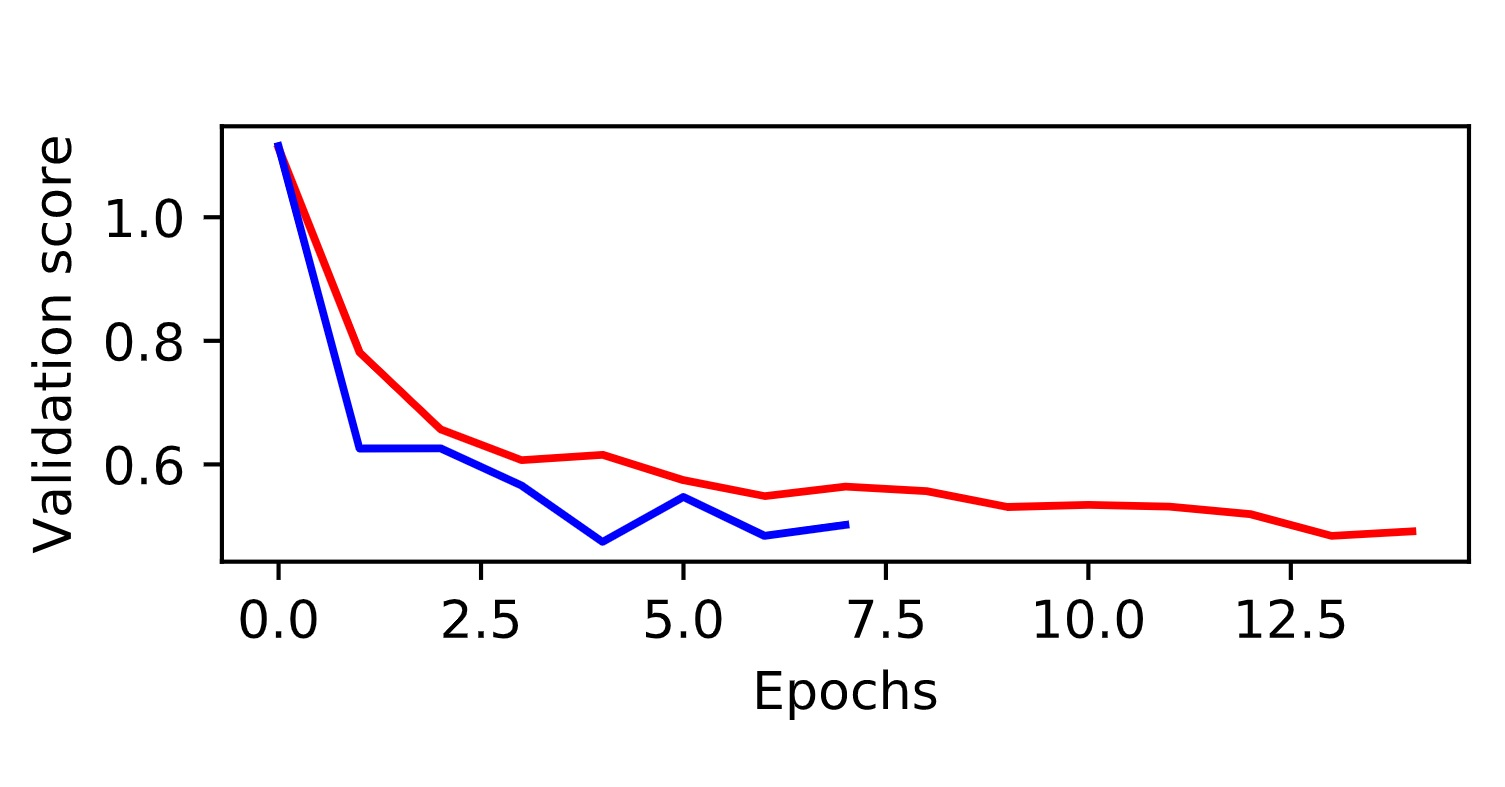

The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model. Nice job!

Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
=================================================================
Total params: 652.0
Trainable params: 652
Non-trainable params: 0.0
_________________________________________________________________
None


In [ ]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


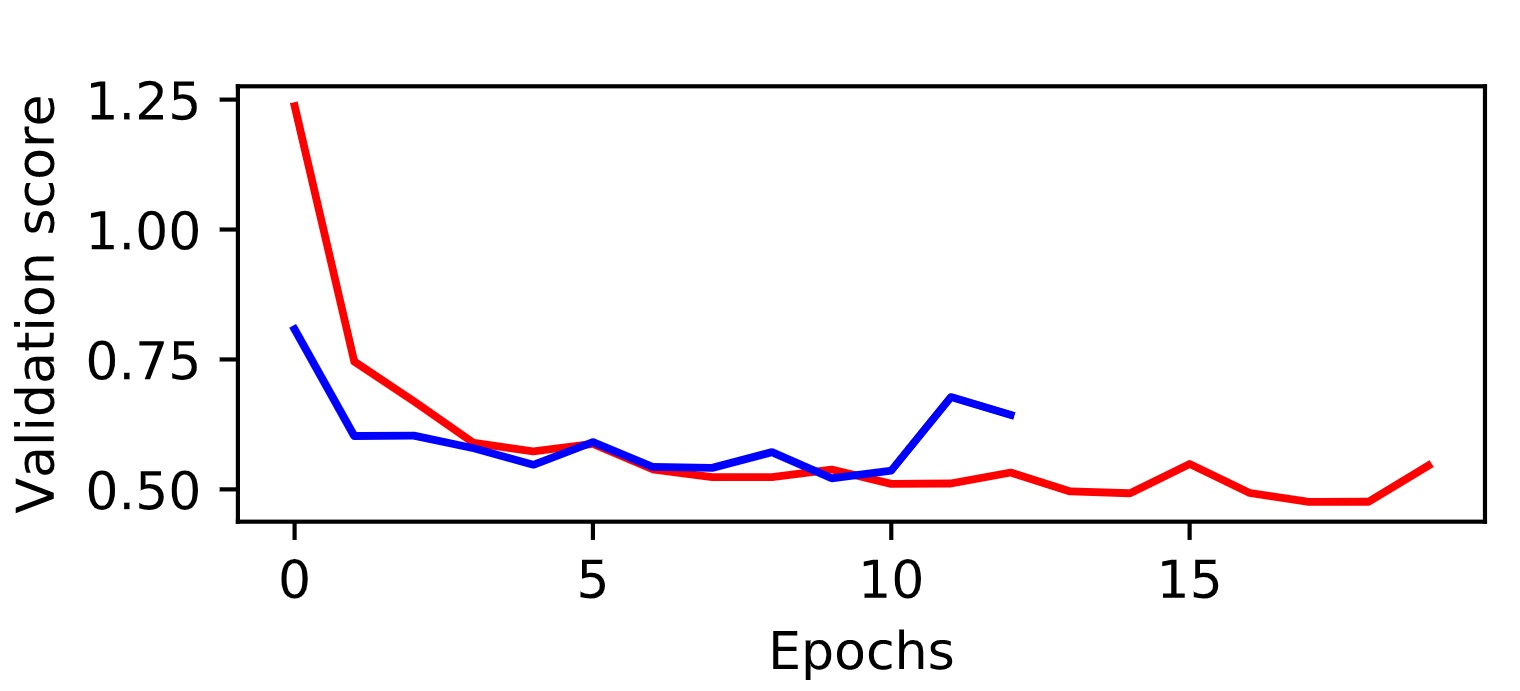

Great work! The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.

Experimenting with model structures

You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

Try a new network with fewer layers than anything you have tried yet.


The answer: Use more units in each hidden layer.


Use fewer units in each hidden layer.



Well done! Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.

Building your own digit recognition model

You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a blog post by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Ready to take your deep learning to the next level? Check out Advanced Deep Learning with Keras in Python to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at "Convolutional Neural Networks for Image Processing" to learn image-specific applications of Keras.



In [1]:
import pandas as pd 

In [ ]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)


Congrats! You've done something pretty amazing. You should see better than 90% accuracy recognizing handwritten digits, even while using a small training set of only 1750 images!